# 1.　一変量グラフ

1 変量のグラフ表示には，名義尺度変数に対しては棒グラフ（bar chart），連続変数に対してはヒストグラム（histogram）が代表的なものである。

RDatasets 中の airquality データセットを用いて例示する。

In [3]:
using RDatasets
airquality = RDatasets.dataset("datasets", "airquality");
rename!(airquality, Dict("Solar.R" => "Solar_R"));
println("size: ", size(airquality))
first(airquality, 5)

size: (153, 6)


,Ozone,Solar_R,Wind,Temp,Month,Day
,Int64?,Int64?,Float64,Int64,Int64,Int64
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,missing,missing,14.3,56,5,5


Ozone, Solar_R は欠損値を含むので取り扱いに注意が必要である。dropmissing() により欠損値をリストワイズ除去したデータフレームも作っておく。同時に，分析に必要のない変数を「選択しない」（それ以外を選択する）ために select() を使う。

In [6]:
using Plots
gr(label="", grid=false)

Plots.GRBackend()

## 1.1.　1 つの変数の場合

bar() は，度数分布をグラフにするので，データフレーム上の変数の棒グラフを描くにはまず度数分布表をつくらなければならない。


In [49]:
using FreqTables
df = RDatasets.dataset("datasets", "HairEyeColor")
first(df, 5)

,Hair,Eye,Sex,Freq
,String,String,String,Int64
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


In [103]:
df2 = DataFrame()
for row in eachrow(df), j in 1:row.Freq
    push!(df2, row)
end

In [104]:
size(df2)

(592, 4)

In [96]:
first(df2, 5)

,Hair,Eye,Sex,Freq
,String,String,String,Int64
1,Black,Brown,Male,32
2,Black,Brown,Male,32
3,Black,Brown,Male,32
4,Black,Brown,Male,32
5,Black,Brown,Male,32


In [179]:
df3 = filter(:Sex => sex -> sex == "Male", df2);
size(df3)     |> println
first(df3, 3) |> println

(279, 4)
3×4 DataFrame
 Row │ Hair    Eye     Sex     Freq  
     │ String  String  String  Int64 
─────┼───────────────────────────────
   1 │ Black   Brown   Male       32
   2 │ Black   Brown   Male       32
   3 │ Black   Brown   Male       32


In [130]:
df3 = df2[df2.Sex .== "Male", :Hair];

(279, 4)
3×4 DataFrame
 Row │ Hair    Eye     Sex     Freq  
     │ String  String  String  Int64 
─────┼───────────────────────────────
   1 │ Black   Brown   Male       32
   2 │ Black   Brown   Male       32
   3 │ Black   Brown   Male       32


279-element Vector{String}:
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 "Black"
 ⋮
 "Red"
 "Red"
 "Red"
 "Red"
 "Blond"
 "Blond"
 "Blond"
 "Blond"
 "Blond"
 "Blond"
 "Blond"
 "Blond"

In [133]:
freq1 = freqtable(df3)
freq1 |> println
names(freq2)[1] |> println

4-element Named Vector{Int64}
Dim1  │ 
──────┼────
Black │  56
Blond │  46
Brown │ 143
Red   │  34
["Black", "Blond", "Brown", "Red"]


オプションを何も指定しないと不適切な棒グラフしか得られないことが多い。

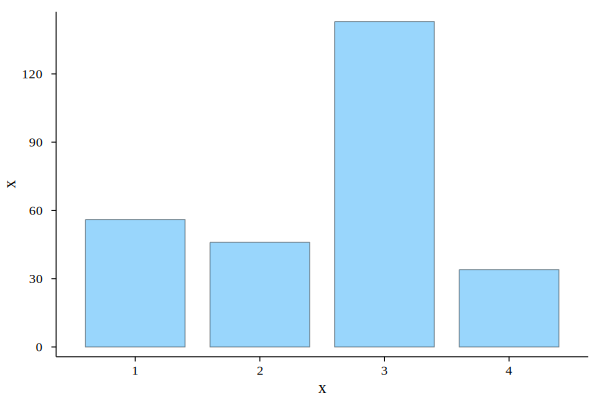

In [137]:
bar(freq[:, "Male"])

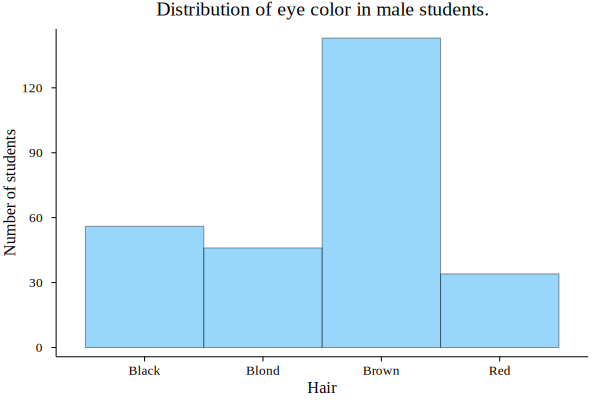

In [165]:
default(
    titlefont = (12, "times"),
    guidefont = (10, "times"),
    tickfont  = ( 8, "times"),
    label     = "",
    grid      = false,
    tick_direction = :out,
    alpha     = 0.4
    )
bar(freq[:, "Male"],
    bar_width = 1,
    xlabel = "Hair",
    xticks = (1:4, names(freq)[1]),
    ylabel = "Number of students",
    title = "Distribution of eye color in male students.",
    )

二次元集計表により，列ごとの棒グラフを描くことができる。

In [132]:
freq = freqtable(df2.Hair, df2.Sex)

4×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │ Female    Male
────────────┼───────────────
Black       │     52      56
Blond       │     81      46
Brown       │    143     143
Red         │     37      34

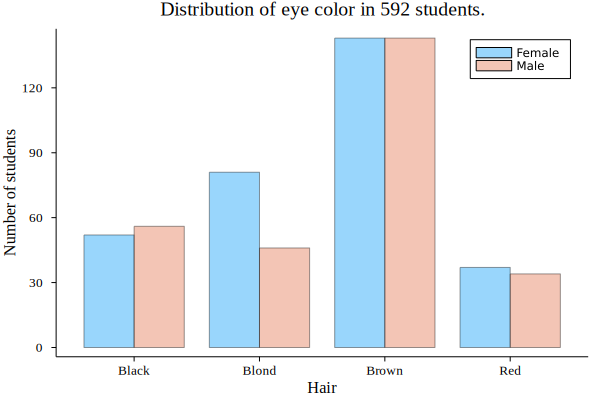

In [178]:
using StatsPlots
p1 = groupedbar(freq,
    bar_width=0.8,
    bar_position = :dodge,
    xlabel = "Hair",
    xticks = (1:4, names(freq)[1]),
    ylabel = "Number of students",
    label = ["Female" "Male"],
    title = "Distribution of eye color in 592 students.",
    )

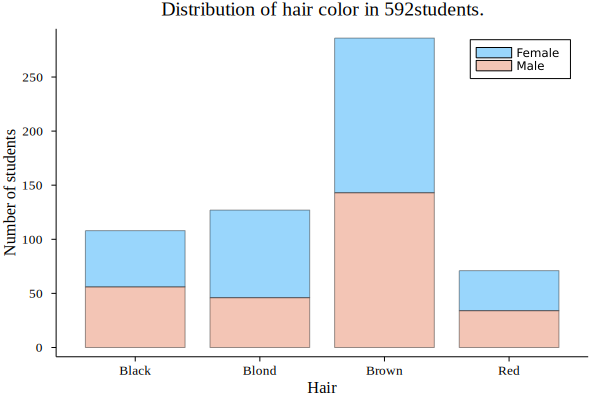

In [173]:
using StatsPlots
p2 = groupedbar(freq,
    bar_width=0.8,
    bar_position = :stack,
    xlabel = "Hair",
    xticks = (1:4, names(freq)[1]),
    ylabel = "Number of students",
    label = ["Female" "Male"],
    title = "Distribution of hair color in 592students.",
    )

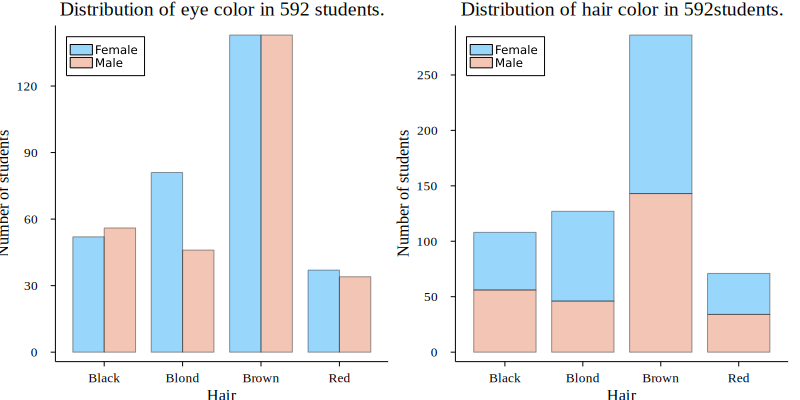

In [177]:
plot(p1, p2, legend=:topleft, size=(800, 400))